# Scikit learn for cross-validating OLS
## Dream Team - ORIE 4741 Project

In [1]:
using CSV, Plots, DataFrames, Statistics, LinearAlgebra, PyCall, Random

In [2]:
include("../plot_pred.jl")

plot_pred_true (generic function with 2 methods)

## Import data

In [3]:
train_df = CSV.read("train.csv", DataFrame);
train = Matrix(train_df);
Xtrain = train[:, 1:(end-3)];

train_std = train[:, 190];
train_ppr = train[:, 191];
train_half = train[:, 192];

test_df = CSV.read("test.csv", DataFrame);
test = Matrix(test_df);
Xtest = test[:, 1:(end-3)];

test_std = test[:, 190];
test_ppr = test[:, 191];
test_half = test[:, 192];

In [4]:
lm = pyimport("sklearn.linear_model")
ms = pyimport("sklearn.model_selection")
metrics = pyimport("sklearn.metrics")
lr = lm.LinearRegression()

PyObject LinearRegression()

Call Python sklearn from Julia.

In [5]:
Random.seed!(0)
lm_cv = ms.cross_validate(lr, Xtrain, train_std, scoring = "neg_mean_squared_error", cv = 10, return_estimator = true)

Dict{Any,Any} with 4 entries:
  "fit_time"   => [1.04196, 1.14508, 1.06248, 1.07478, 1.52236, 1.46523, 1.3782…
  "score_time" => [0.00399065, 0.00300598, 0.00299239, 0.00498772, 0.00398993, …
  "estimator"  => (PyObject LinearRegression(), PyObject LinearRegression(), Py…
  "test_score" => [-19.4019, -20.3972, -20.3694, -19.26, -19.5687, -18.6355, -2…

In [6]:
lm_cv["test_score"]

10-element Array{Float64,1}:
 -19.40186817895818
 -20.397181819484718
 -20.369369785145558
 -19.26000643968881
 -19.568684395388058
 -18.63549692253282
 -20.28925951099432
 -20.386428289477415
 -20.08919402632861
 -19.685583415680206

In [7]:
lm_6_coef = lm_cv["estimator"][6].coef_

189-element Array{Float64,1}:
  0.04339017348232608
  4.810698640099426
 -2.3657577653065394
 -0.04084052483211989
 -0.0018732410804482014
 -0.17719466382665763
  0.1367918612002914
  7.436589864329502
  0.025503737582328184
 -0.149930960581512
  0.12540062033436472
  7.083969954644814
 -2.608853522263473
  ⋮
  8.881784197001252e-16
 -0.8369196447996181
 -4.440892098500626e-16
 -3.469400547081872
 -0.7989706825161744
  3.9049242570453324
 -1.882929698823729
  0.0
  0.0
  0.0
  0.0
  0.0

In [8]:
"""This function computes the mean squared error."""
function MSE(y, pred)
    error = (y.-pred).^2
    mse = sum(error[:, 1])/size(error, 1)
    return mse
end

MSE

In [9]:
test_pred = sum(lm_6_coef'.*Xtest, dims = 2)
MSE(test_std, test_pred)

20.241934563905307

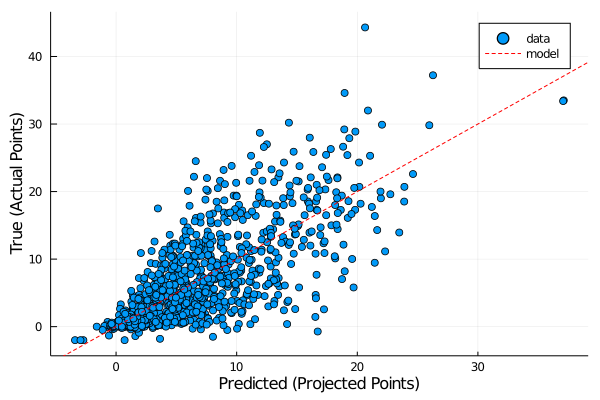

In [10]:
plot_pred_true(test_pred, test_std)

In [11]:
lm_cv_ppr = ms.cross_validate(lr, Xtrain, train_ppr, scoring = "neg_mean_squared_error", cv = 10, return_estimator = true)
lm_cv_ppr["test_score"]

10-element Array{Float64,1}:
 -26.514288695935374
 -27.57148395516559
 -27.935940894234136
 -26.068981483473586
 -26.51737555670674
 -25.164956581869173
 -27.51703314993512
 -27.538237451075034
 -27.381970479148062
 -26.693909890937757

In [15]:
lm_cv_ppr_coef = lm_cv_ppr["estimator"][6].coef_;

In [12]:
lm_cv_half = ms.cross_validate(lr, Xtrain, train_half, scoring = "neg_mean_squared_error", cv = 10, return_estimator = true)
lm_cv_half["test_score"]

10-element Array{Float64,1}:
 -22.501428832848063
 -23.521458591759526
 -23.684025477497812
 -22.237788802314384
 -22.584666958462325
 -21.462563558067142
 -23.440486300363755
 -23.502254647094507
 -23.27175574680925
 -22.730851703621777

In [16]:
lm_cv_half_coef = lm_cv_half["estimator"][6].coef_;

In [25]:
test_pred_ppr = sum(lm_cv_ppr_coef'.*Xtest, dims = 2)
test_pred_half = sum(lm_cv_half_coef'.*Xtest, dims = 2);

## Export

In [37]:
test_pred_all = CSV.read("test_pred.csv", DataFrame)
test_pred_all.std_ols = vec(test_pred)
test_pred_all.ppr_ols = vec(test_pred_ppr)
test_pred_all.half_ols = vec(test_pred_half);
# CSV.write("$(pwd())\\test_pred.csv", test_pred_all)

In [38]:
test_pred_all

,std_lasso,ppr_lasso,half_lasso,std_ols,ppr_ols,half_ols,std_q
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,15.801,15.9087,15.8553,16.6327,16.5623,16.5975,11.2032
2,2.7594,4.77035,3.78934,1.52381,3.40414,2.46398,0.795474
3,9.86625,10.0567,10.0122,9.9692,9.95217,9.96069,3.35419
4,10.6943,14.3002,12.4515,11.7643,15.4057,13.585,5.7738
5,-0.0505484,0.927129,0.44758,-0.887724,-0.0463213,-0.467023,0.1047
6,4.91188,8.49866,6.66692,4.92657,8.721,6.82378,2.06637
7,1.60315,3.41625,2.43659,0.817062,2.85074,1.8339,1.54591
8,4.24795,5.04232,4.66932,4.85143,5.71985,5.28564,1.11586
9,18.6298,18.623,18.6345,18.8255,18.5911,18.7083,11.8656


## Plot

In [69]:
function plotDiagonal_2(xmin, xmax)
    xsamples = [xmin, xmax]
    plot!(xsamples, xsamples, color = :black, linestyle = :dash, label = "True Model", linealpha = 0.7, lw = 2)
end

plotDiagonal_2 (generic function with 1 method)

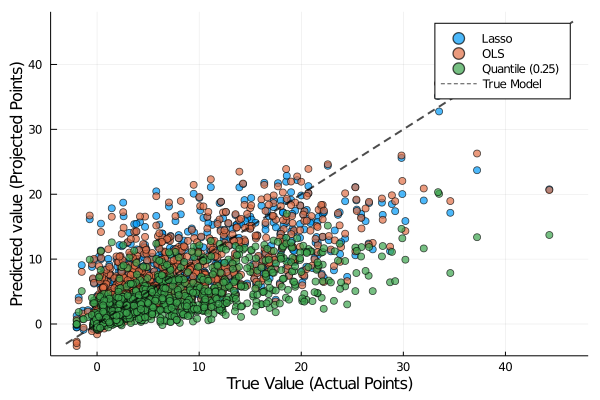

In [70]:
scatter(test_std[1:1000], test_pred_all[1:1000, :std_lasso], label = "Lasso", seriesalpha = 0.7)
scatter!(test_std[1:1000], test_pred_all[1:1000, :std_ols], label = "OLS", seriesalpha = 0.7)
scatter!(test_std[1:1000], test_pred_all[1:1000, :std_q], label = "Quantile (0.25)", seriesalpha = 0.7)
# plot!(test_std[1:1000], test_std[1:1000], label = "True model", linestyle = :dash, seriesalpha = 0.4, color = :red)
plotDiagonal_2(minimum(test_std[1:1000]) .- 0.05*(maximum(test_pred_all[1:1000, :std_q]) .- minimum(test_pred_all[1:1000, :std_q])), maximum(test_std[1:1000]) .+ 0.05*(maximum(test_std[1:1000] .- minimum(test_std[1:1000]))))
xlabel!("True Value (Actual Points)")
ylabel!("Predicted value (Projected Points)")

In [71]:
# savefig("scatter.png")